###  EWMA
1. ewma:指数加权移动平均

2. ewma： 

$$EWMA(t) = \lambda \times y(t) + (\lambda-1 )\times EWMA(t-1)  
$$

    t = 1,2,3...n
    
    EWMA(t)：t时刻的估计值
    
    y(t)：t时刻的测量值
    
    n：测量的时间序列长度

$\lambda （0<\lambda<1)$ ：表示EWMA对历史数据估计数据EWMA(t-1)与目前测量值y(t)

    λ 决定了EWMA估计器跟踪实际数据突然发生变化的能力，即时效性， 显然随着λ 增大,估计器的时效性就越强，反之，越弱;另一方面，由于 λ 的存在，EWMA还表现出一定的吸收瞬时突发的能力，这种能力称为平稳性。显然随着 λ 减小， 估计器的平稳性增强，反之降低。

3. ewma功能：

    1. 从概率角度看，EWMA是一种理想的最大似然估计技术，它采用一个权重因子 λ 对数据进行估计，当前估计值由前一次估计值和当前的抽样值共同决定

    2. 从信号处理角度看，EWMA可以看成是一个低通滤波器，通过控制 λ 值，剔除短期波动、保留长期发展趋势提供了信号的平滑形式
    
---
1. numba：不能加速 pandas

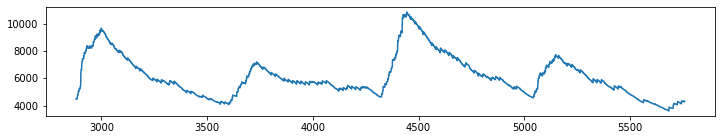

In [38]:
## 测试数据获取
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "/home/chen/my_git/ts_detector/outlier_detector/Ha_test_data.csv"
df = pd.read_csv(path)
test_data = df.iloc[2880:2880*2,]
plt.figure(figsize=(12,2))
plt.plot(test_data.index,test_data["y"])
x  = pd.Series(test_data['y'].values)
x_ = test_data.index

In [32]:
# list 比pandas series速度快
import time

def ewma(_lambda,x):
    """
    param _lamdba: 
    """
    ewma_list = []
    ewma_list.append(x[0])
    for i in range(1,len(x),1):
        ewma = _lambda * x[i] + (1 - _lambda) * ewma_list[i-1]
        ewma_list.append(ewma)
    return ewma_list

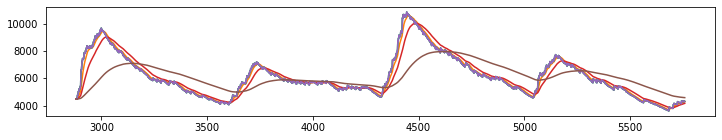

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,2))
for _lambda in [0.1,0.03,0.005]:
    ewma_value = ewma(_lambda,x)
    plt.plot(x_,x)
    plt.plot(x_,ewma_value)